```
Student-1
Name: Sabiha Khair Ohi
ID: 20-41905-1
```

```
Student-2
Name: Rijoan Fardous
ID: 20-41943-1
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [24]:
# load/import all required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [25]:
# write task-1 solution

np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/python_final_project_group_01/heart_failure_dataset.csv')
df = shuffle(df)
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
349   36   M           ASY        110            0          1     Normal   
653   42   M           NAP        130          180          0     Normal   
7     54   M           ATA        110          208          0     Normal   
571   69   M           ASY        140          110          1     Normal   
171   40   M           NAP        140          235          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
98    56   M           ASY        120           85          0     Normal   
322   38   F           ASY        105            0          1     Normal   
382   43   M           ASY        115            0          0     Normal   
365   64   F           ASY        200            0          0     Normal   
510   60   M           ASY        136          195          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
349    125              Y  

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [26]:
# write task-2 solution

duplicated_rows = df.duplicated().any()
print("Have Duplicated Rows: ", duplicated_rows)

empty_cells = df.isnull().sum().sum()
print("Number Of Empty Cells: ", empty_cells)

print("\nData Types:")
print(df.dtypes)

df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
median_bp = df['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].fillna(median_bp)

df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
median_cholesterol = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].fillna(median_cholesterol)

for x in df.index:
    if df.loc[x, 'Cholesterol'] > 450:
        df.loc[x, 'Cholesterol'] = 450

Have Duplicated Rows:  False
Number Of Empty Cells:  0

Data Types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

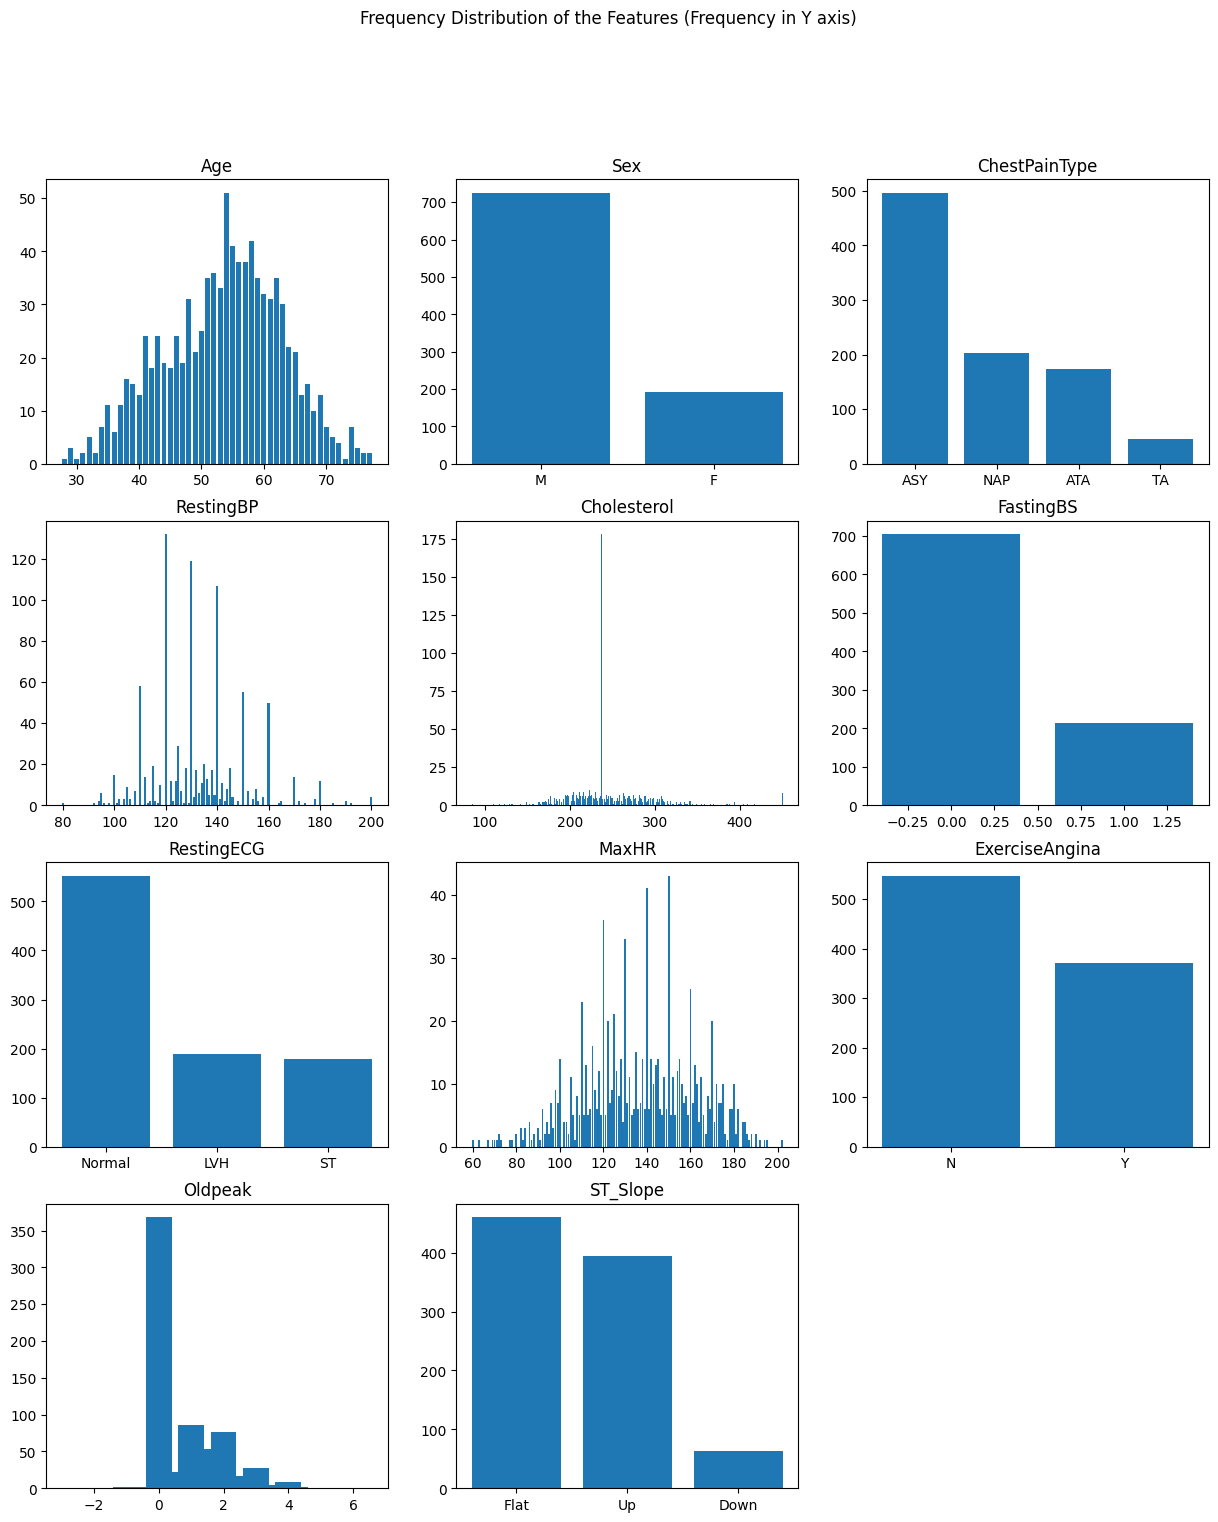

In [27]:
# write task-3 solution

plt.figure(figsize=(15, 17))

for i, column in enumerate(df.columns[:-1]):
  frequency = df[column].value_counts()
  plt.subplot(4, 3, i+1)
  plt.bar(frequency.index, frequency.values)
  plt.title(column)

plt.suptitle("Frequency Distribution of the Features (Frequency in Y axis)")
plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

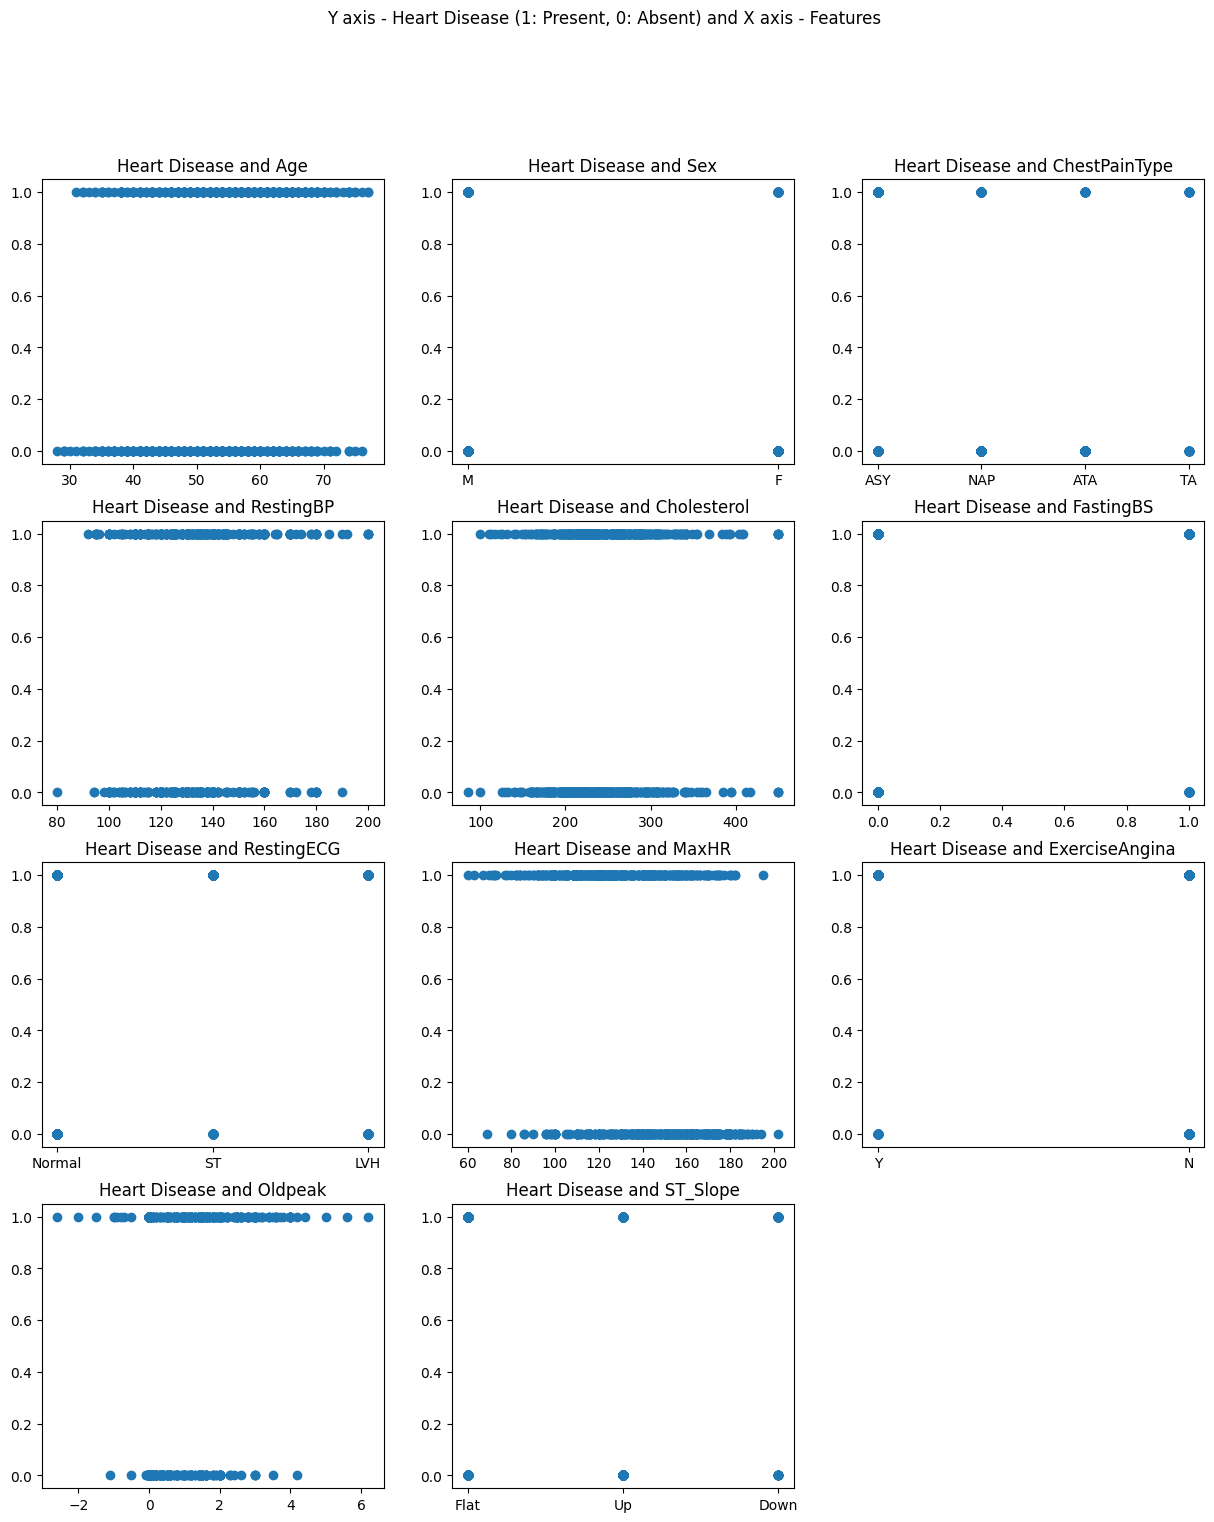

In [17]:
# write task-4 solution

plt.figure(figsize=(15, 17))
target_column = 'HeartDisease'

for i, column in enumerate(df.columns[:11]):
  plt.subplot(4, 3, i+1)
  plt.scatter(df[column], df[target_column])
  plt.title(f'Heart Disease and {column}')

plt.suptitle("Y axis - Heart Disease (1: Present, 0: Absent) and X axis - Features")
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [18]:
# write task-5 solution

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

label_encoder = LabelEncoder()
for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])

print("\nData Types:")
print(df.dtypes)

all_features = df.columns
features = all_features[:-1]

X = df[features].copy()
y = df['HeartDisease']

scale = StandardScaler()
X[features] = scale.fit_transform(X)

print("\nFeatures After Scaling:")
print(X)


Data Types:
Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

Features After Scaling:
          Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
349 -1.857431  0.515952      -0.816995  -1.253488    -0.111707   1.813758   
653 -1.220994  0.515952       1.275059  -0.141161    -1.235996  -0.551341   
7    0.051881  0.515952       0.229032  -1.253488    -0.683714  -0.551341   
571  1.642975  0.515952      -0.816995   0.415002    -2.616702   1.813758   
171 -1.433140  0.515952       1.275059   0.415002    -0.151156  -0.551341   
..        ...       ...            ...        ...          ...        ...   
98   0.264027  0.515952      -0.816995  -0.697325    -3.109811  -0.551341   
322 -1.645286 -1.938

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [19]:
# write task-6 solution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (734, 11) (734,)
Testing Data Shape: (184, 11) (184,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [20]:
# write task-7 solution

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
predicted = naive_bayes_classifier.predict(X_test)
actual = y_test

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

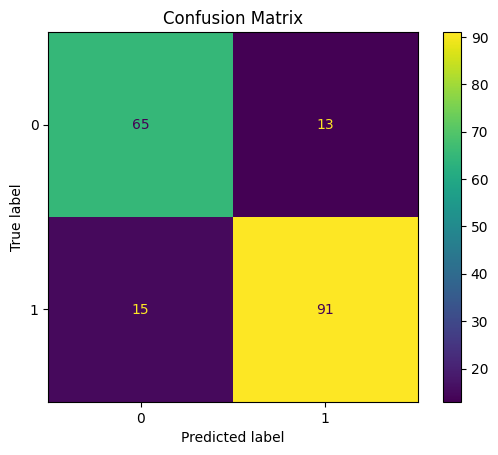

In [21]:
# write task-8 solution

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = naive_bayes_classifier.classes_)

cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [22]:
# write task-9 solution

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Recall = metrics.recall_score(actual, predicted)
F1_score = metrics.f1_score(actual, predicted)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1 Score:", F1_score)

Accuracy: 0.8478260869565217
Precision: 0.875
Recall: 0.8584905660377359
F1 Score: 0.8666666666666667


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [23]:
# write task-10 solution

k_folds = KFold(n_splits = 10)
cross_val_scores = cross_val_score(naive_bayes_classifier, X, y, cv=k_folds)

print("Each Fold Accuracy:", cross_val_scores)

mean_accuracy = cross_val_scores.mean()
print("\nMean Accuracy:", mean_accuracy)

Each Fold Accuracy: [0.84782609 0.76086957 0.85869565 0.89130435 0.81521739 0.85869565
 0.82608696 0.85869565 0.86813187 0.82417582]

Mean Accuracy: 0.8409698996655519
